In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)
import os
import seaborn as sns

In [5]:
import oggm


In [10]:
_files_pygem = os.listdir(f'CMIP5/mass_annual/{rgi_reg}')

In [18]:
load = False
if load:
    for r in np.arange(1,20,1):
        rgi_reg = f'{r:02d}'
        _rgis_w_c_l = []
        for cmip in ['CMIP5','CMIP6']:

            _files_pygem = os.listdir(f'{cmip}/mass_annual/{rgi_reg}')
            rgis_w_l = []

            # get the common running glaciers of all scenarios and gcms for each region 
            for ff in _files_pygem:
                ds = xr.open_dataset(f'{cmip}/mass_annual/{rgi_reg}/{ff}').glac_mass_annual
                ds['glacier'] = ds['RGIId'].values
                n_glac_reg = len(ds.glacier)
                rgis_w = ds.dropna(dim='glacier', how='any').glacier.values
                rgis_w_l.append(set(rgis_w))
            _rgis_w_c = list(rgis_w_l[0].intersection(rgis_w_l[1],rgis_w_l[2]))
            _rgis_w_c_l.append(set(_rgis_w_c))
            print(rgi_reg, len(_rgis_w_c), n_glac_reg)
        rgis_w_c_both = list(_rgis_w_c_l[0].intersection(_rgis_w_c_l[1]))
        print(rgi_reg, len(rgis_w_c_both), n_glac_reg)
        for cmip in ['CMIP5','CMIP6']:
            output_fp = f'regional-csv-files/PyGEM-OGGM/volume/{cmip}/2300/RGI{rgi_reg}'
            oggm.utils.mkdir(output_fp)
            # now let's only select those common running glaciers to create
            # regionall summed csv files ..
            _files_pygem = os.listdir(f'{cmip}/mass_annual/{rgi_reg}')
            for ff in _files_pygem:
                scenario = ff.split('_')[4]
                ds = xr.open_dataset(f'{cmip}/mass_annual/{rgi_reg}/{ff}').glac_mass_annual
                ds['glacier'] = ds['RGIId'].values
                ds['model'] = ds['Climate_Model'].values
                # select the common running glaciers
                ds = ds.sel(glacier = rgis_w_c_both)
                # sum over all glaciers to get regional estimates
                ds = ds.sum(dim='glacier')
                # now create volume estimates out of mass estimates
                # i.e.  m3 = kg / 900 kg/m3
                ds_vol = ds / 900 # kg/m3
                pd_vol = ds_vol.to_dataframe().reset_index()
                pd_vol = pd_vol[['model','glac_mass_annual','year']]
                pd_vol = pd_vol.pivot(columns='model', index = 'year', values='glac_mass_annual')
                pd_vol.index.name = 'time'
                pd_vol.columns.name = None
                pd_vol.to_csv(f'{output_fp}/{scenario}.csv')


In [20]:
path_pygem = 'regional-csv-files/PyGEM-OGGM/'
create_pygem_globally = True
if create_pygem_globally:
    # globally: sum over all RGI regions
    from oggm.utils import mkdir

    ssps_2300 = ['ssp126','ssp534-over', 'ssp585']
    for var in ['volume']: #, 'area']:
        cmip = 'CMIP6' 
        end_years = [2300]
        for end_year in end_years:
            odir = f'{path_pygem}{var}/{cmip}/{end_year}/global/'
            mkdir(odir)
            for scenario in ssps_2300:
                odf = 0
                for n in np.arange(1,20,1):
                    rgi_reg = f'RGI{n:02d}'
                    idir = f'{path_pygem}{var}/{cmip}/{end_year}/{rgi_reg}'
                    df = pd.read_csv(idir + f'/{scenario}.csv', index_col=0)
                    odf += df
                odf.to_csv(odir + f'/{scenario}.csv')
    rcps_2300 = ['rcp26', 'rcp45', 'rcp60','rcp85']
    for var in ['volume']: #, 'area']:
        cmip = 'CMIP5' 
        end_years = [2300]
        for end_year in end_years:
            odir = f'{path_pygem}{var}/{cmip}/{end_year}/global/'
            mkdir(odir)
            for scenario in rcps_2300:
                odf = 0
                for n in np.arange(1,20,1):
                    rgi_reg = f'RGI{n:02d}'
                    idir = f'{path_pygem}{var}/{cmip}/{end_year}/{rgi_reg}'
                    df = pd.read_csv(idir + f'/{scenario}.csv', index_col=0)
                    odf += df
                odf.to_csv(odir + f'/{scenario}.csv')

In [21]:
path_d =  {}
path_d['PyGEM-OGGM'] = 'regional-csv-files/PyGEM-OGGM/'

**make some example plots**

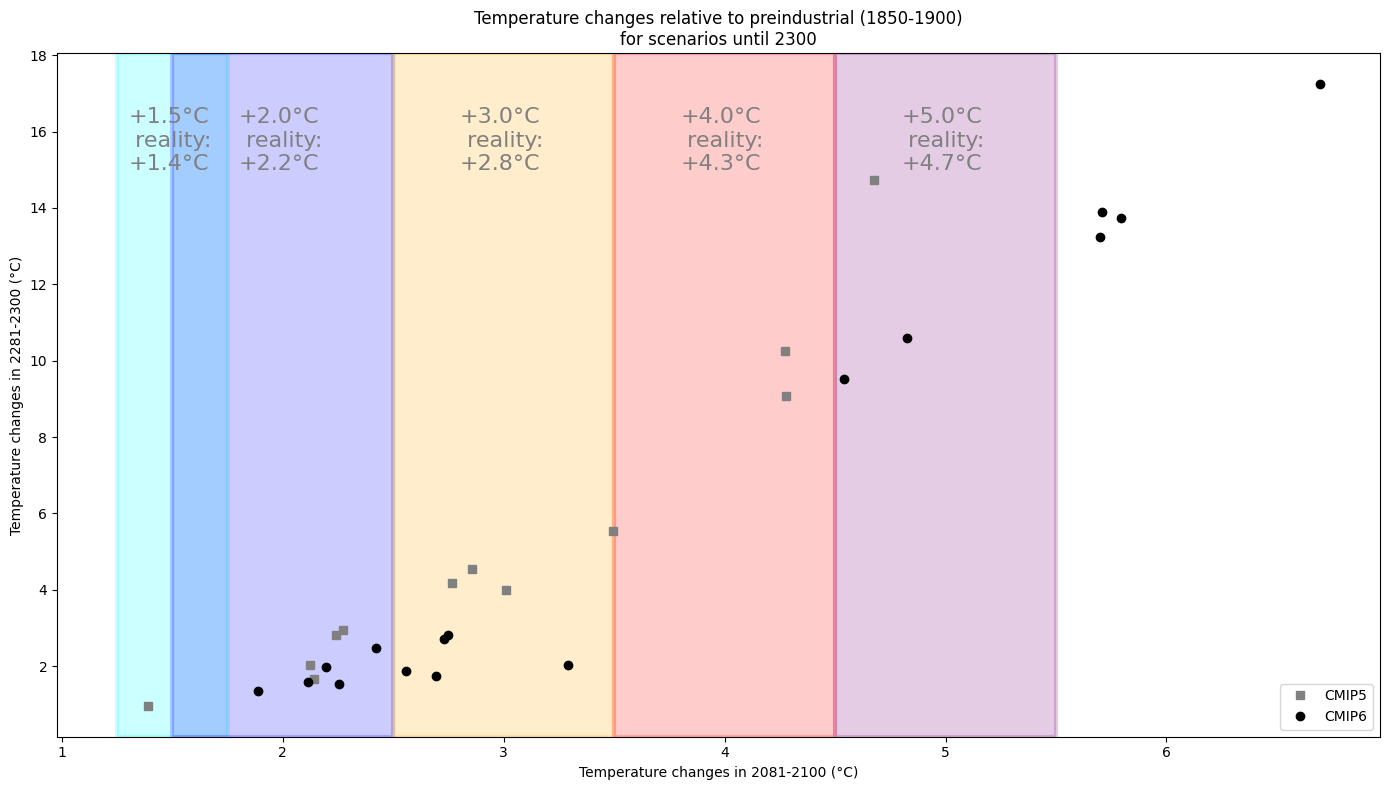

In [22]:
# region descriptions ...
d_reg_num_name = {}
d_reg_num_name['global'] = 'Global'
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard and Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus and Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['19'] = 'Antarctic and Subantarctic'

d_reg_num_name_icci = {}
d_reg_num_name_icci_reg = {'low-latitudes':['16'], 'mid-latitudes':['08', '11','02','18'], 'polar-hma':['06','13-14-15','01','04','17']}
d_reg_num_name_icci_reg['Glaciers globally'] = ['global']

d_reg_num_name_icci['global'] = 'Glaciers globally'
d_reg_num_name_icci['01'] = 'Glaciers of Alaska'
d_reg_num_name_icci['02'] = 'Glaciers of Western Canada & US'
d_reg_num_name_icci['03'] = 'Glaciers of Arctic Canada (North)'
d_reg_num_name_icci['04'] = 'Glaciers of Arctic Canada (South)'
d_reg_num_name_icci['05'] = 'Glaciers of Greenland'
d_reg_num_name_icci['06'] = 'Glaciers of Iceland'
d_reg_num_name_icci['07'] = 'Glaciers of Svalbard and Jan Mayen'
d_reg_num_name_icci['08'] = 'Glaciers of Scandinavia'
d_reg_num_name_icci['09'] = 'Glaciers of Russian Arctic'
d_reg_num_name_icci['10'] = 'Glaciers of North Asia'
d_reg_num_name_icci['11'] = 'Glaciers of the Alps'
d_reg_num_name_icci['12'] = 'Glaciers of Caucasus and Middle East'
d_reg_num_name_icci['13'] = 'Glaciers of Central Asia'
d_reg_num_name_icci['13-14-15'] = 'Glaciers of High Mountain Asia'
d_reg_num_name_icci['14'] = 'Glaciers of South Asia West'
d_reg_num_name_icci['15'] = 'Glaciers of South Asia East'
d_reg_num_name_icci['16'] = 'Tropical Glaciers'
d_reg_num_name_icci['17'] = 'Glaciers of Patagonia & Southern Andes'
d_reg_num_name_icci['18'] = 'Glaciers of New Zealand'
d_reg_num_name_icci['19'] = 'Glaciers of Antarctic and Subantarctic'

colors_temp= {'+1.5°C':'cyan', '+2.0°C':'blue', '+3.0°C':'orange', '+4.0°C':'red', '+5.0°C':'purple'}


# pd_temp_ch_2100_2300_cmip5 = pd.read_csv('Global_mean_temp_deviation_2081_2100_2281_2300_rel_1850_1900_cmip5_gcms.csv', index_col=0)
# need to check which interpolation to choose, .... 
import oggm
_file_cmip5 = '/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2081_2100_2281_2300_rel_1850_1900_cmip5_gcms.csv'
_file_cmip6 = '/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2081_2100_2281_2300_rel_1850_1900_cmip6_gcms.csv'
pd_cmip5_temp_ch_2100 = pd.read_csv(_file_cmip5, index_col=0)
pd_cmip6_temp_ch_2100 = pd.read_csv(_file_cmip6, index_col=0)
# change this path to your local path 
#path = '/home/lilianschuster/oggm-standard-projections-csv-files/1.6.1'
#df_meta = pd.read_csv(f'{path}/common_running_2100_2300/metadata.csv')
#df_rel_2300 = pd.DataFrame(columns = df_meta.gcm.unique())




pd_cmip_temp_ch_2100 = pd.concat([pd_cmip6_temp_ch_2100, pd_cmip5_temp_ch_2100])
pd_cmip_temp_ch_2100 = pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100.ssp != 'ssp534-over']
index_2300 = pd_cmip_temp_ch_2100['global_temp_ch_2281-2300_preindustrial'].dropna().index
temp_lev_reality = {}
for temp_lev in colors_temp.keys():
    _t = np.round(pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100.loc[index_2300,
                                                            f'global_temp_ch_level_2081-2100_preindustrial_{temp_lev}'].dropna().index,
                                  'global_temp_ch_2081-2100_preindustrial'].median(), 1)
    temp_lev_reality[temp_lev] = f'+{_t}°C'
    
plt.plot(pd_cmip5_temp_ch_2100['global_temp_ch_2081-2100_preindustrial'], pd_cmip5_temp_ch_2100['global_temp_ch_2281-2300_preindustrial'],
         's', label='CMIP5', color='grey')
plt.ylabel('global_temp_ch_2281-2300_preindustrial')
plt.xlabel('global_temp_ch_2081-2100_preindustrial')
plt.gca().axvspan(1.25, 1.75, color='cyan', alpha = 0.2,lw=3)
plt.gca().axvspan(1.5, 2.5, color='blue', alpha = 0.2,lw=3)
plt.gca().axvspan(2.5, 3.5, color='orange', alpha = 0.2,lw=3)
plt.gca().axvspan(3.5, 4.5, color='red', alpha = 0.2,lw=3)
plt.gca().axvspan(4.5, 5.5, color='purple', alpha = 0.2,lw=3)


plt.plot(pd_cmip6_temp_ch_2100['global_temp_ch_2081-2100_preindustrial'], pd_cmip6_temp_ch_2100['global_temp_ch_2281-2300_preindustrial'],
         'o', label='CMIP6', color='black')
plt.ylabel('Temperature changes in 2281-2300 (°C)')
plt.xlabel('Temperature changes in 2081-2100 (°C)')
plt.title('Temperature changes relative to preindustrial (1850-1900)\nfor scenarios until 2300')
plt.legend()
plt.tight_layout()
plt.savefig('overview_temperature_levels.png')
for k in temp_lev_reality.keys():
    plt.text(float(k[1:4])-0.2, 15, f'{k}\n reality:\n{temp_lev_reality[k]}', color='grey', fontsize=16)


######################
pd_proj_2100_2300 = pd.DataFrame(index=pd_cmip_temp_ch_2100.index )

from scipy.optimize import curve_fit

def exponential_decay(x, a, b):
    # avoind overflow -> does not work ... 
    exp_values = -b * x
    #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
    return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
param_bounds = ([0, 0], [1000, 5])
pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                        columns=['rgi_reg','year', 'a', 'b'])
rgi_regs_global = ['global','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']

In [23]:
rgi_regs_global = ['global','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp126
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CAMS-CSM1-0_ssp126
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CCSM4_rcp45
CMIP5 GFDL-ESM2G_rcp45
CMIP5 NORESM1-M_rcp45
CMIP5 GISS-E2-R_rcp45
CMIP5 GFDL-ESM2G_rcp60
CMIP5 GISS-E2-R_rcp60
CMIP5 IPSL-CM5A-LR_rcp26
CMIP5 CSIRO-MK3-6-0_rcp26
CMIP5 CCSM4_rcp26
CMIP5 CNRM-CM5_rcp26
CMIP5 CANESM2_rcp26
CMIP6 MPI-ESM1-2-HR_ssp245
CMIP6 MPI-ESM1-2-HR_ssp126
CMIP6 GFDL-ESM4_ssp245
CMIP6 GFDL-ESM4_ssp126
CMIP6 INM-CM4-8_ssp245
CMIP6 INM-CM5-0_ssp245
CMIP6 INM-CM5-0_ssp126
CMIP6 MRI-ESM2-0_ssp119
CMIP6 CESM2_ssp126
CMIP6 CAMS-CSM1-0_ssp245
CMIP6 BCC-CSM2-MR_ssp126
CMIP6 NORESM2-MM_ssp126
CMIP6 EC-EARTH3_ssp126
CMIP6 EC-EARTH3-VEG_ssp126
CMIP6 FGOALS-F3-L_ssp126
CMIP6 NORESM2-MM_ssp245
CMIP6 EC-EARTH3-VEG_ssp119
CMIP5 CNRM-CM5_rcp

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

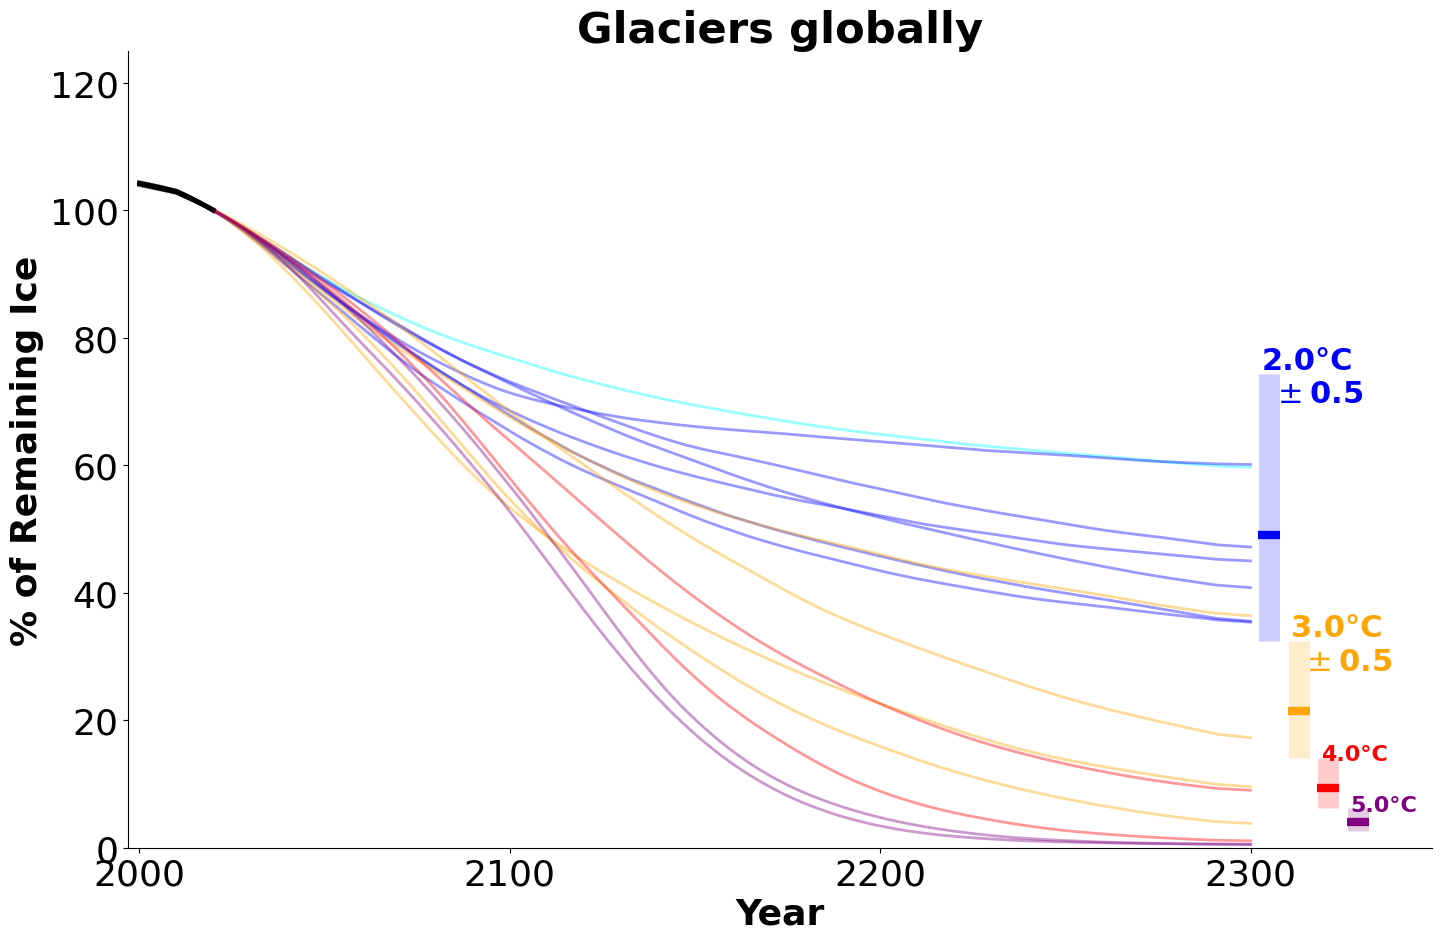

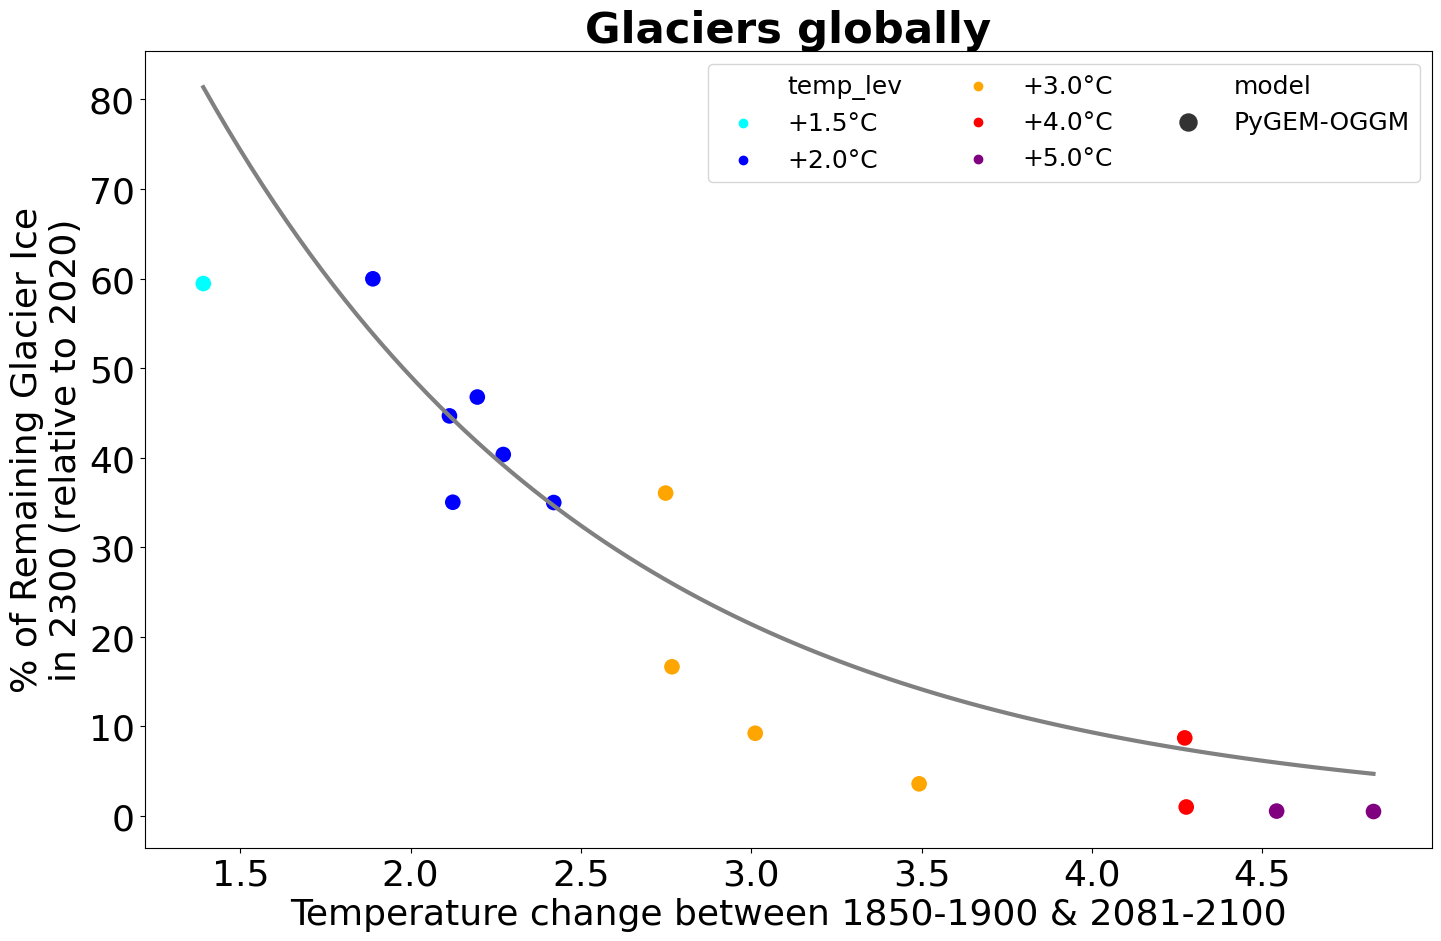

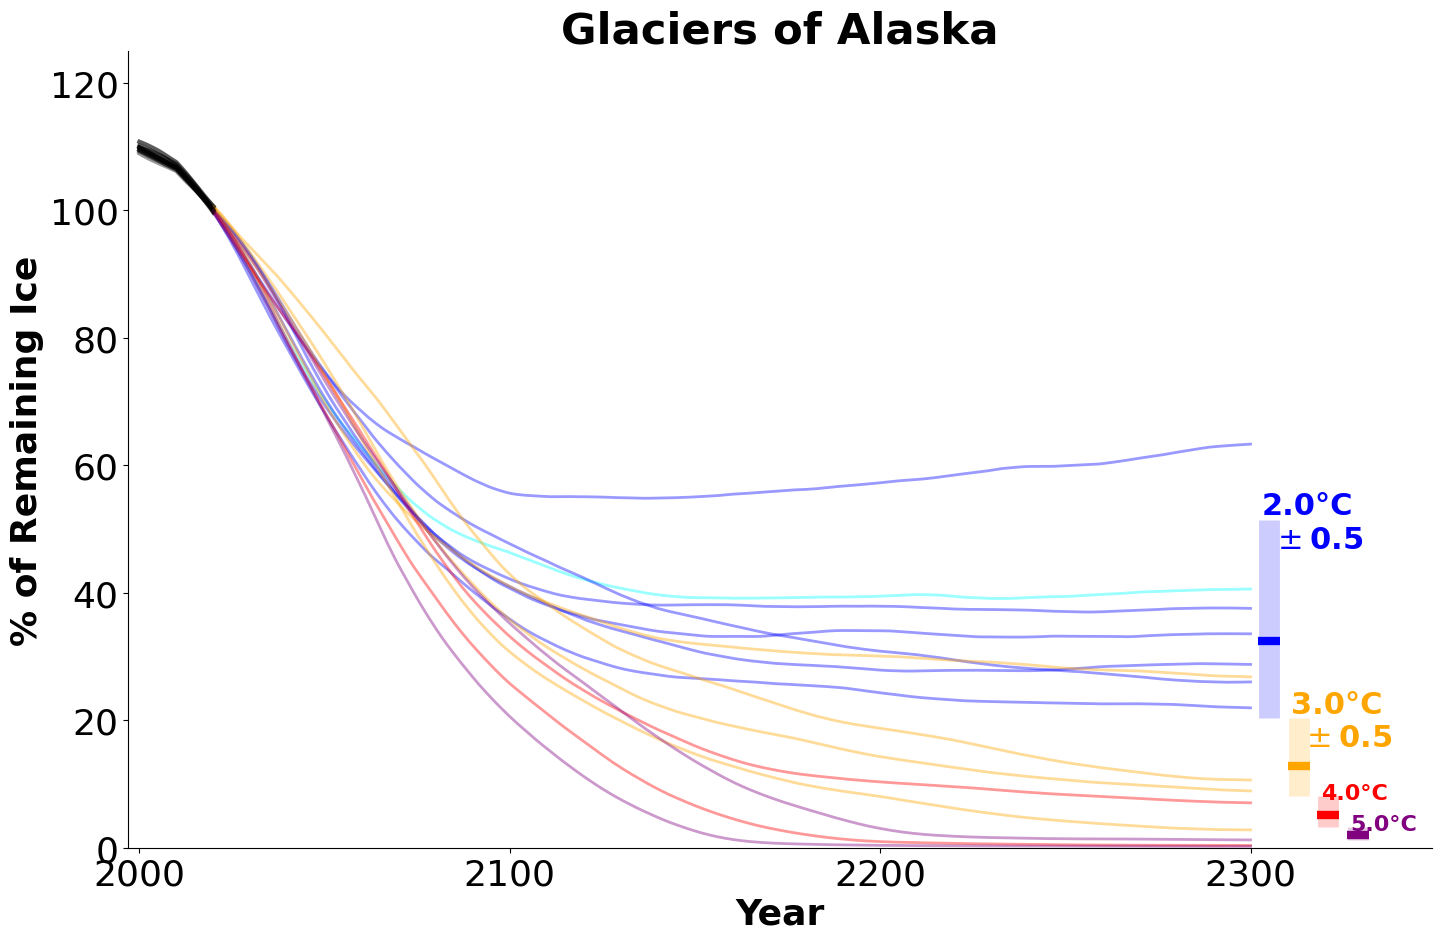

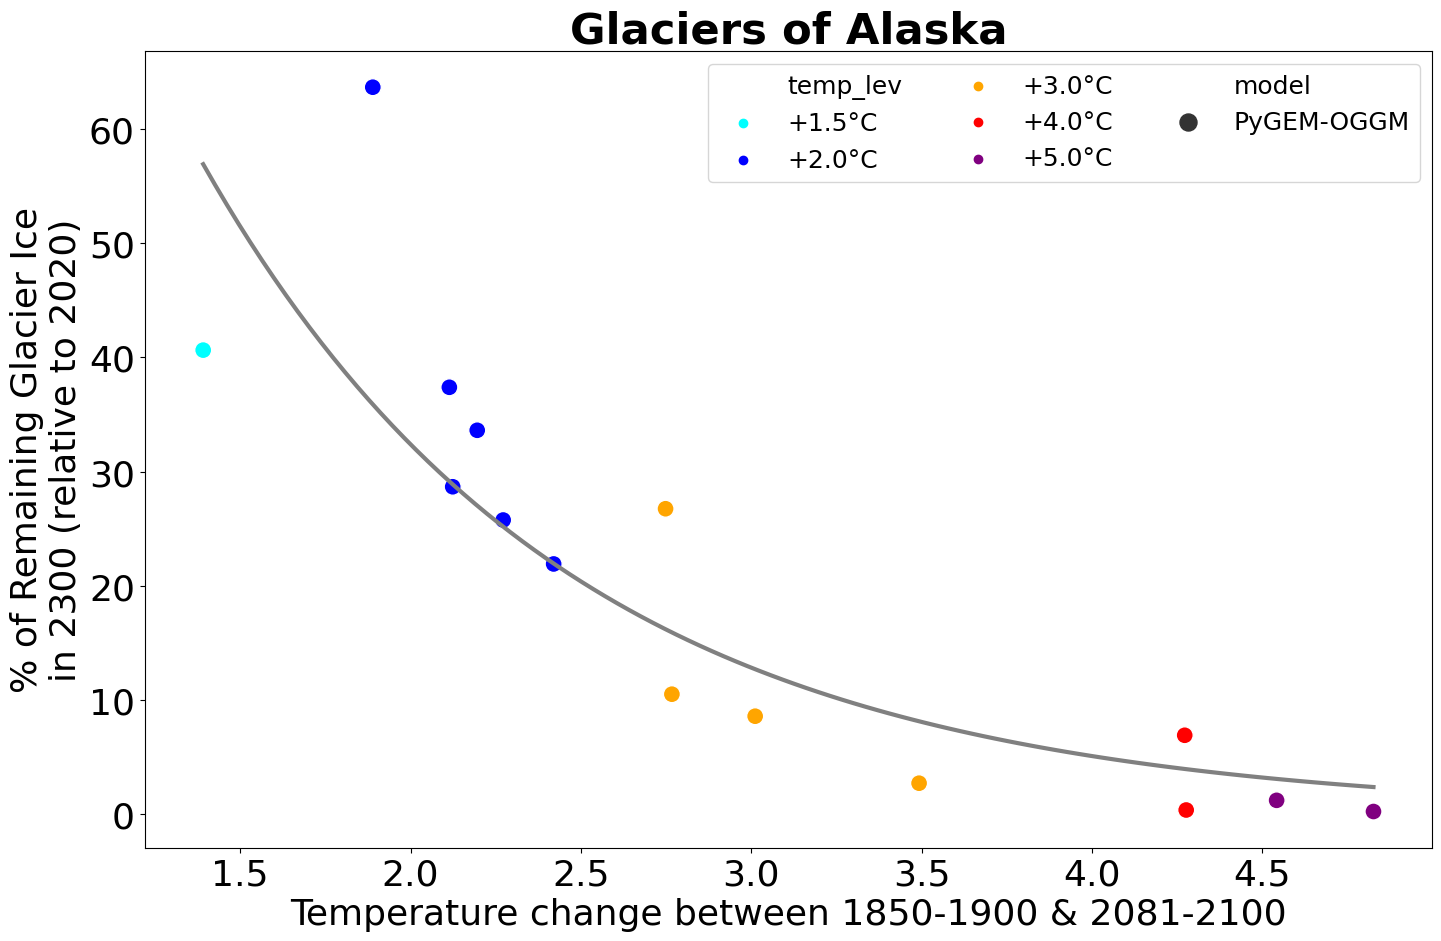

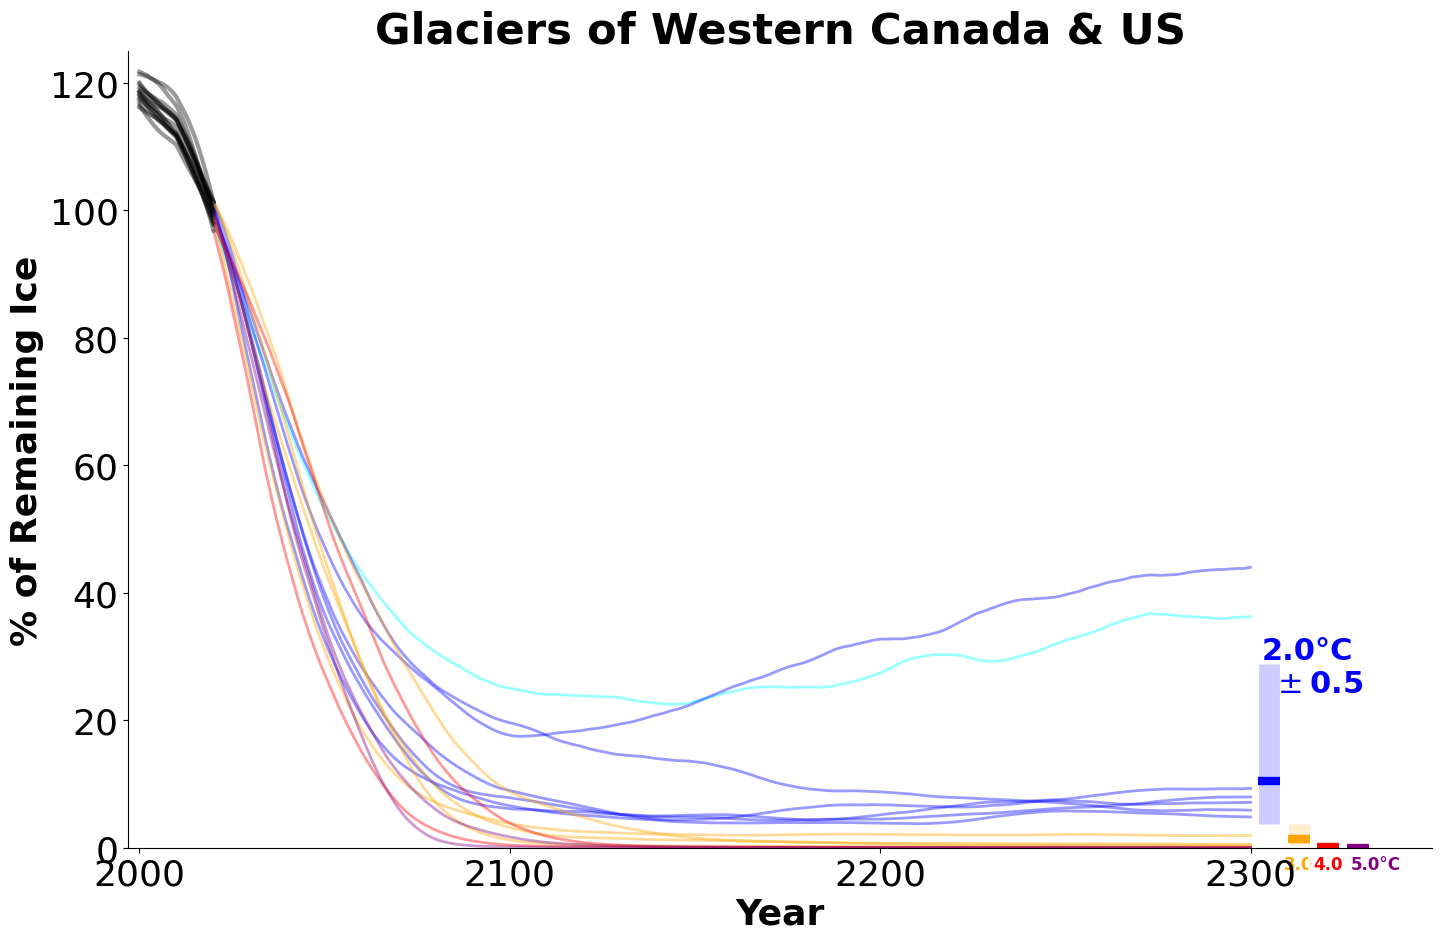

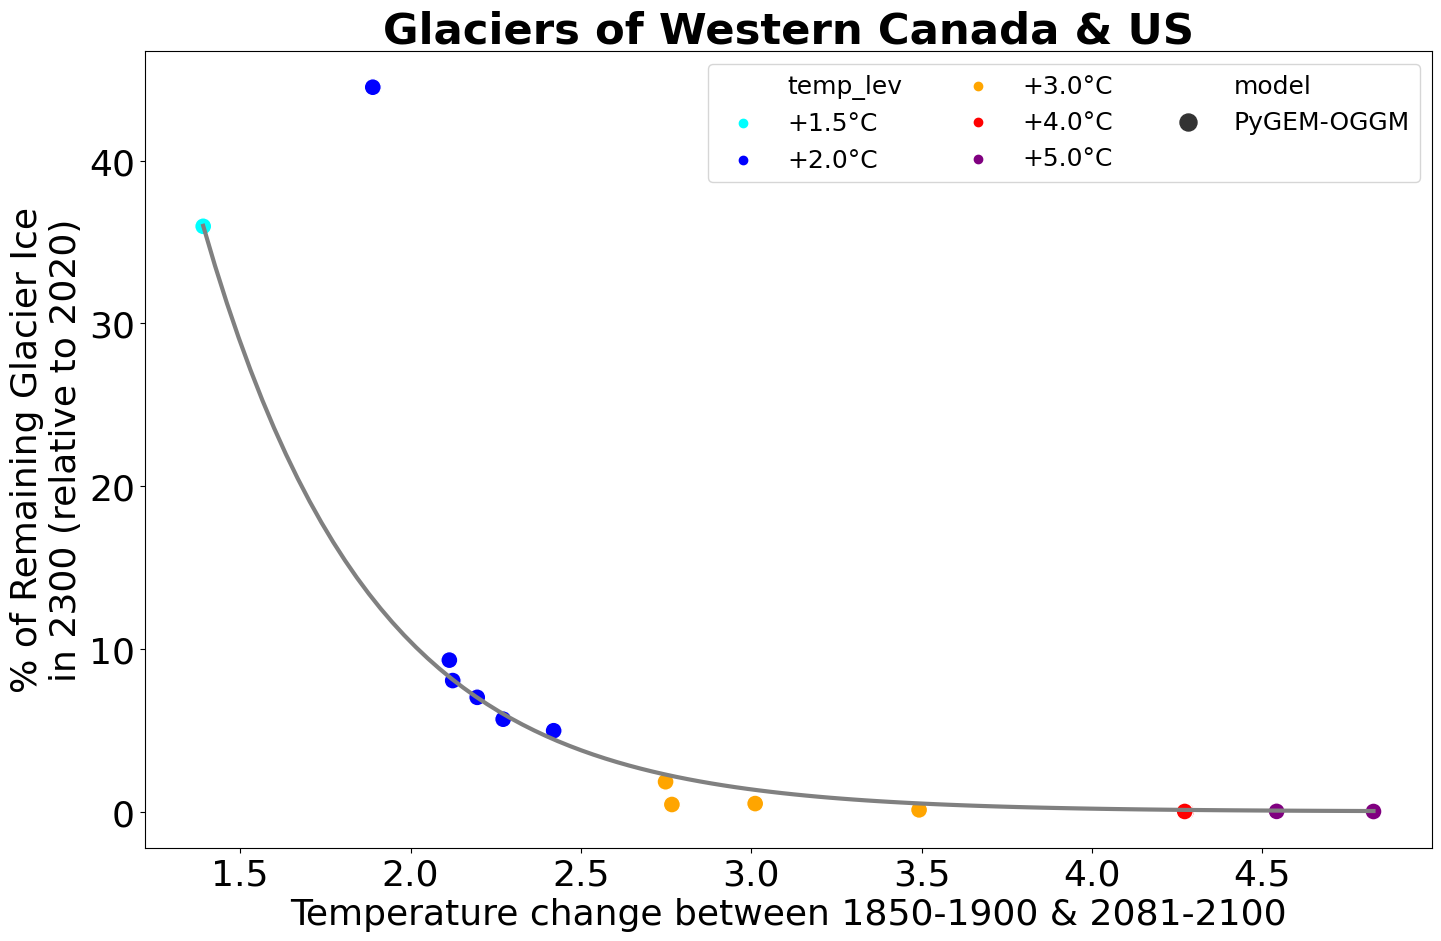

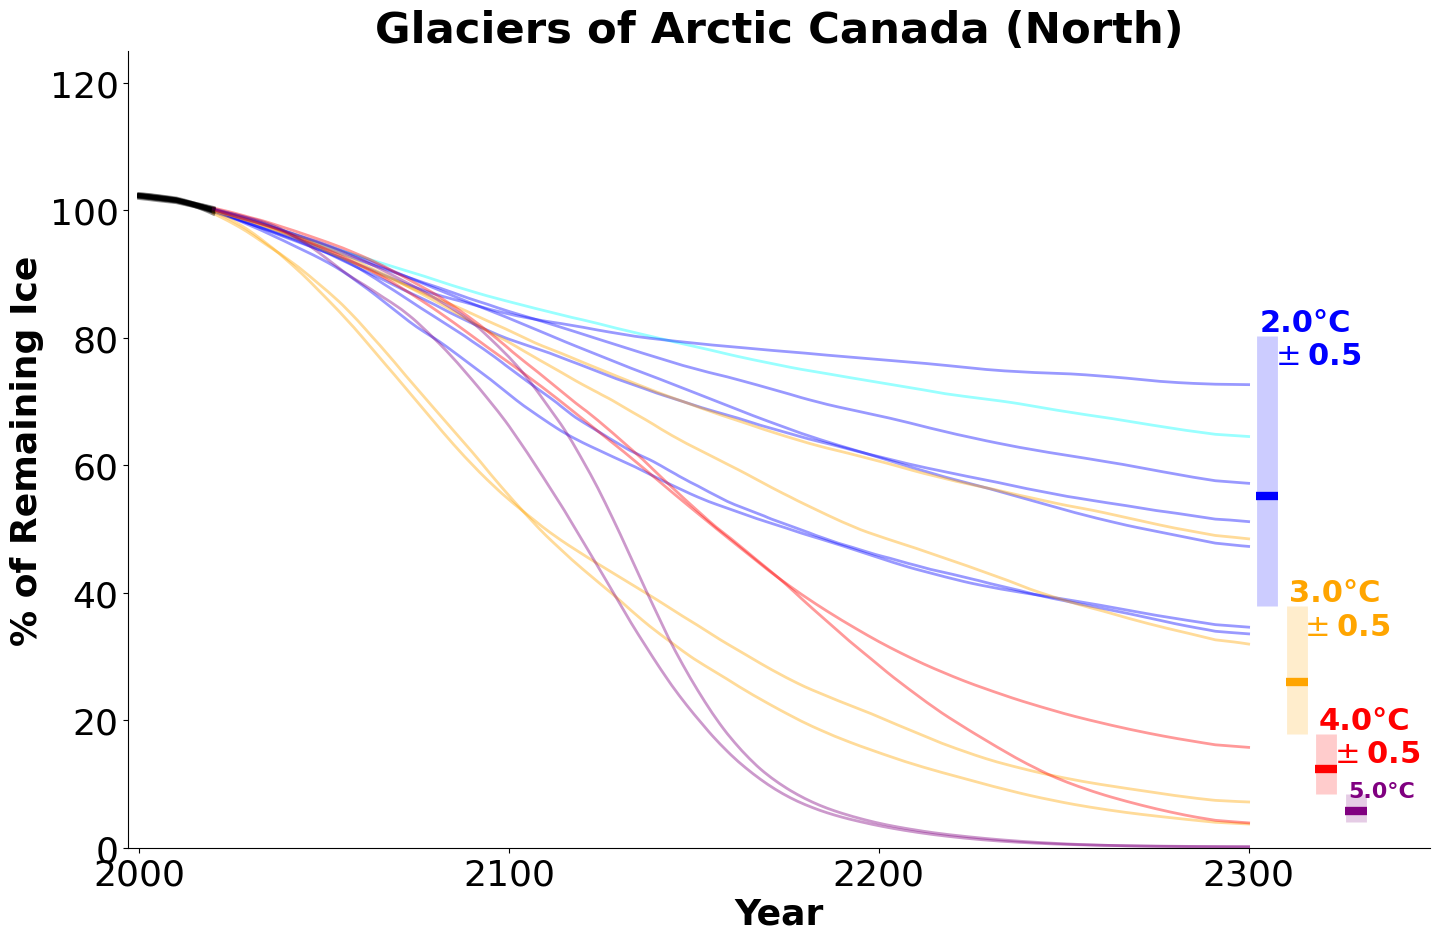

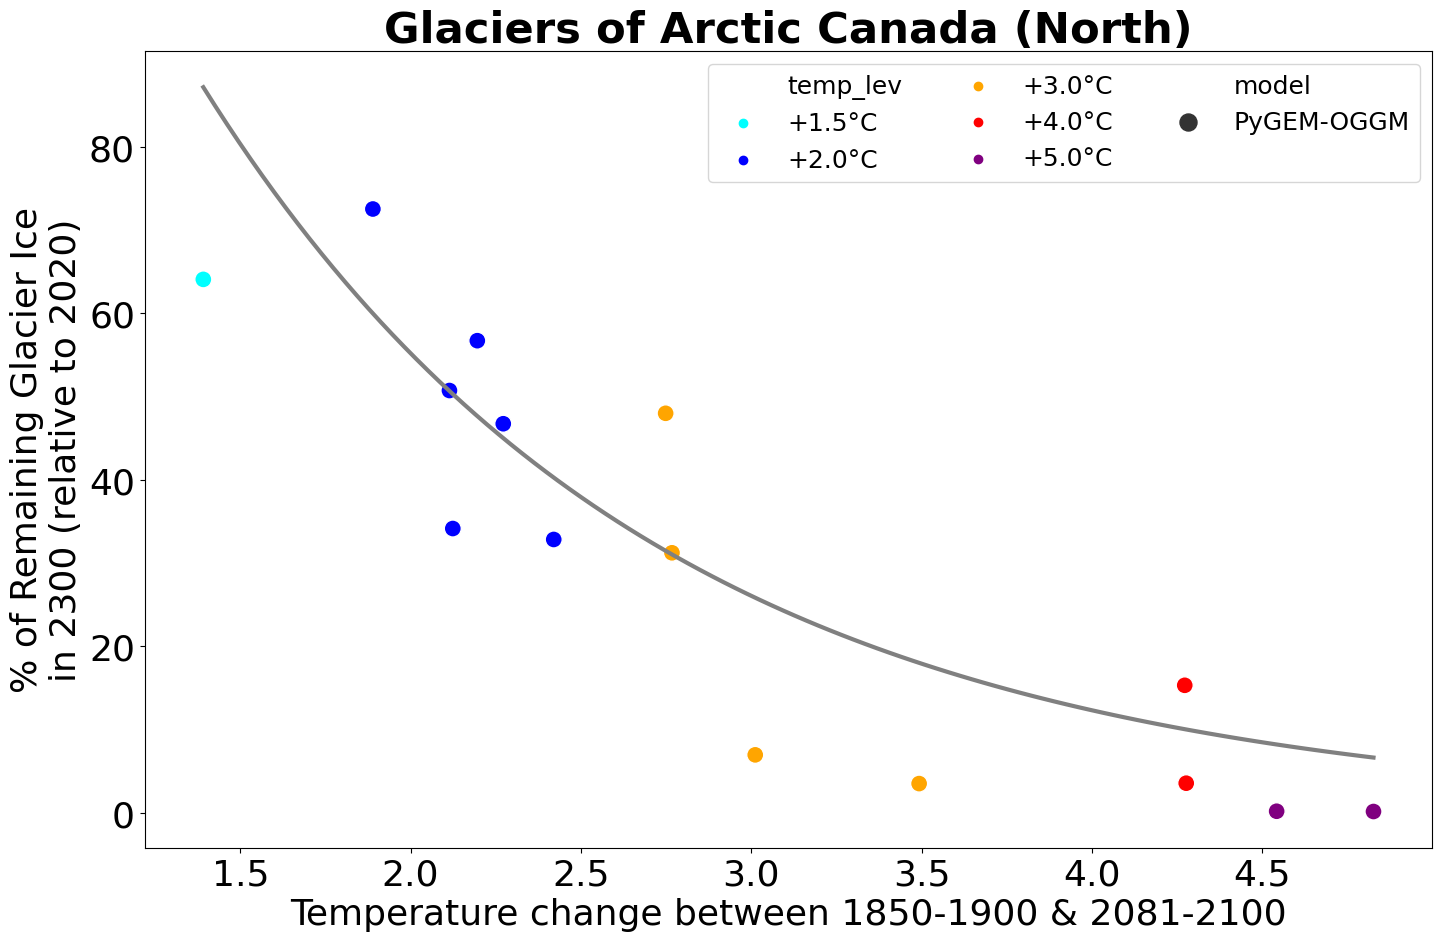

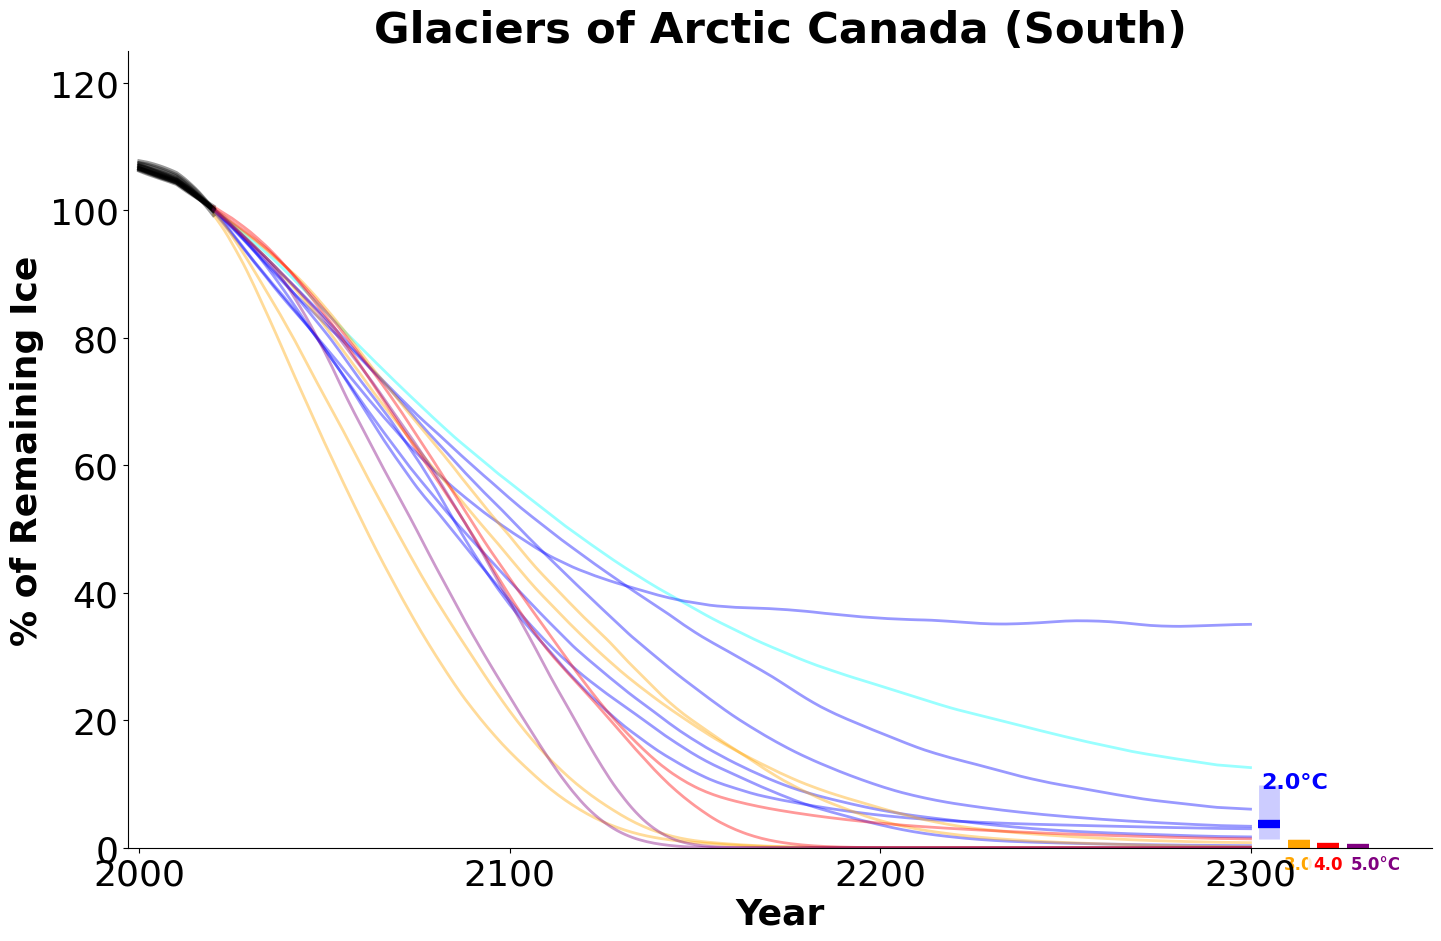

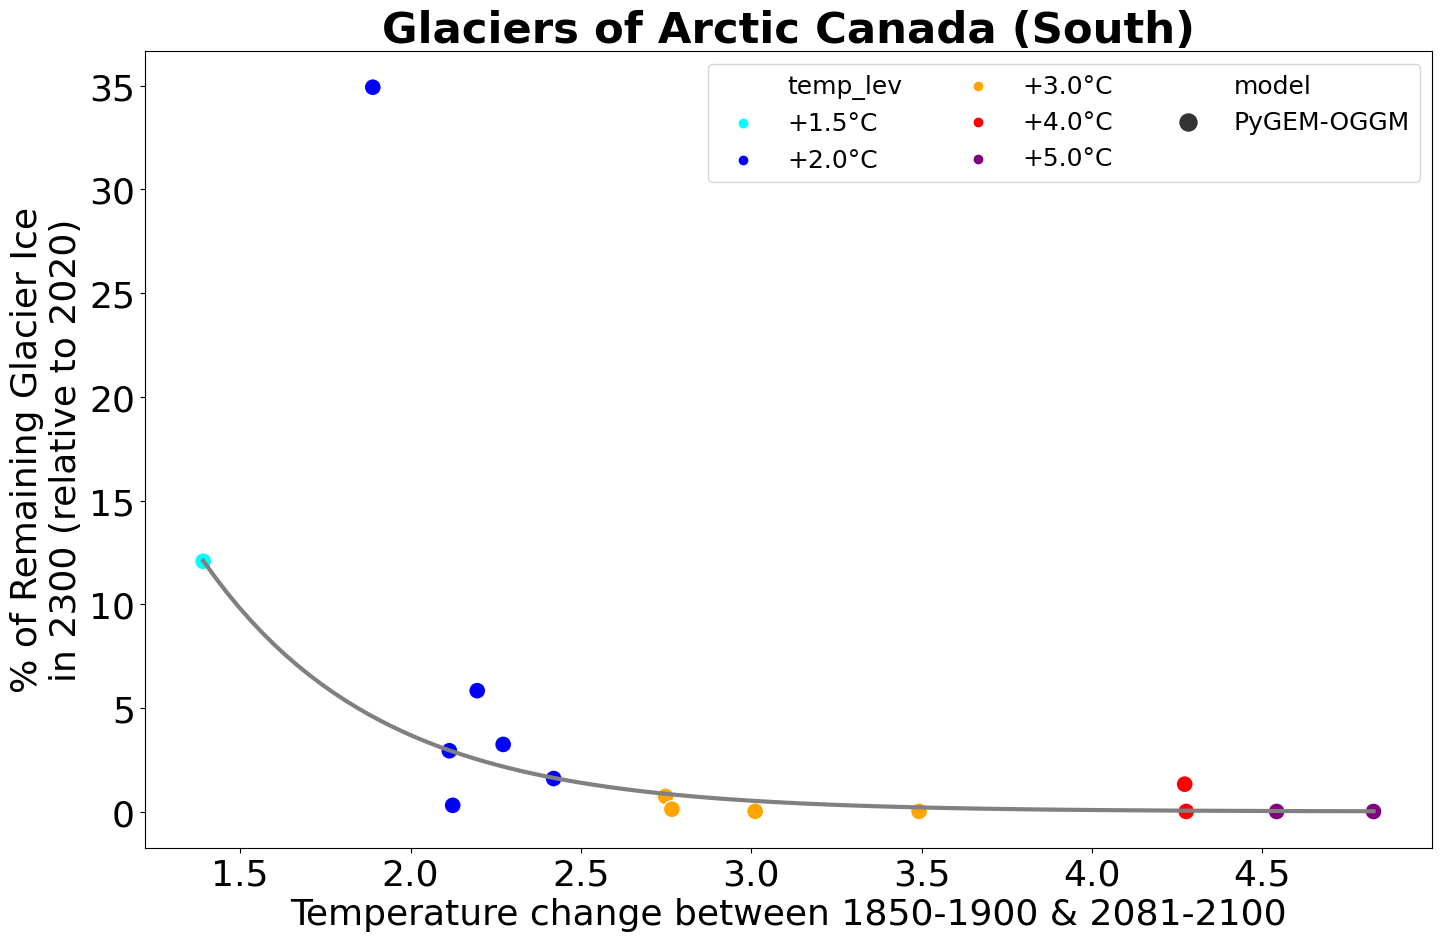

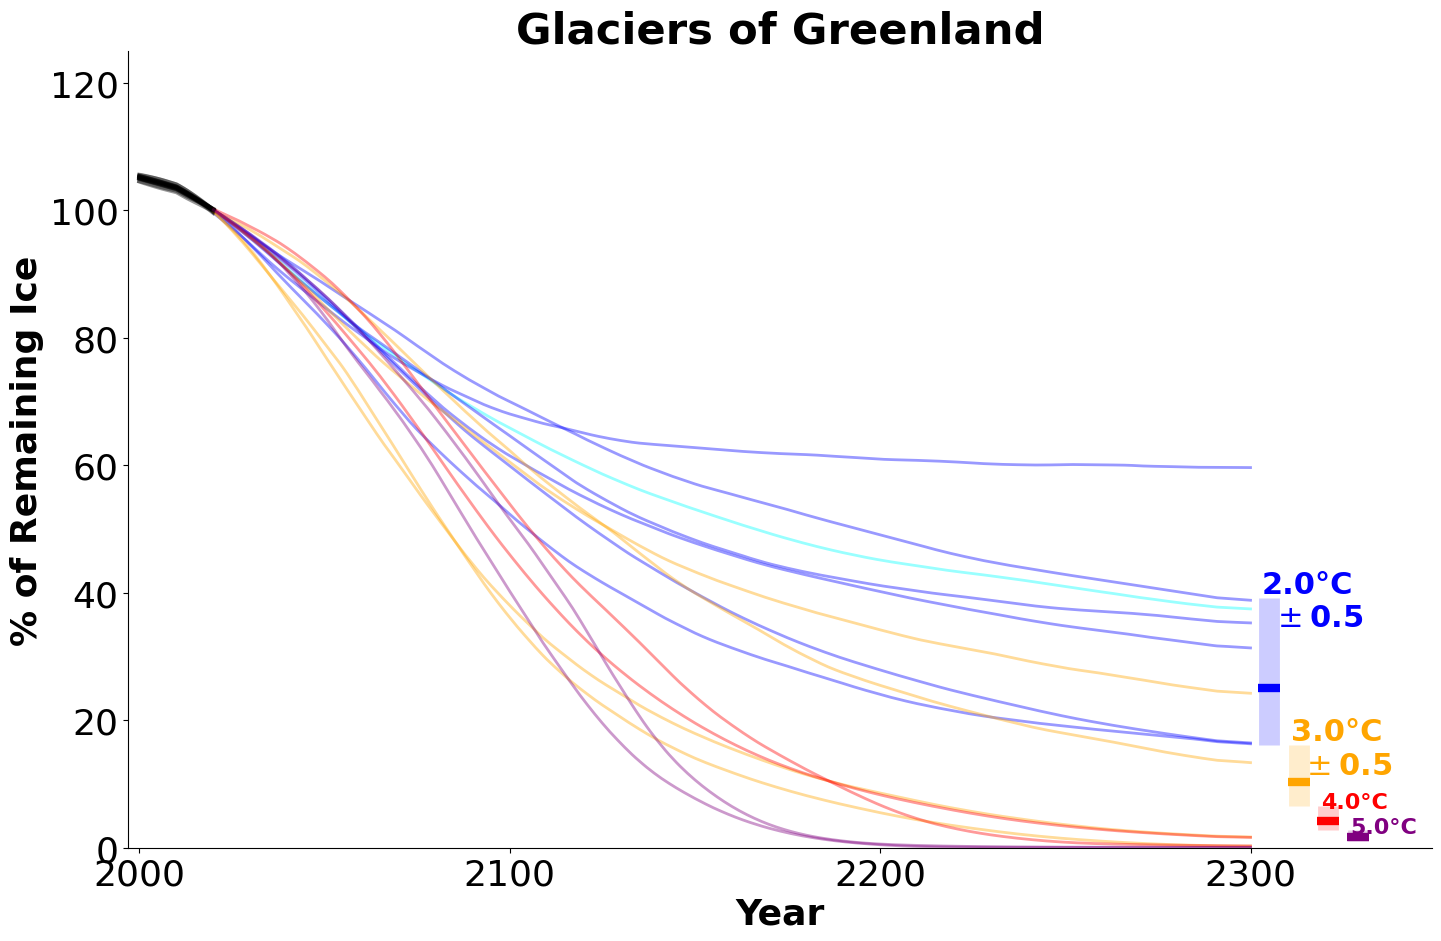

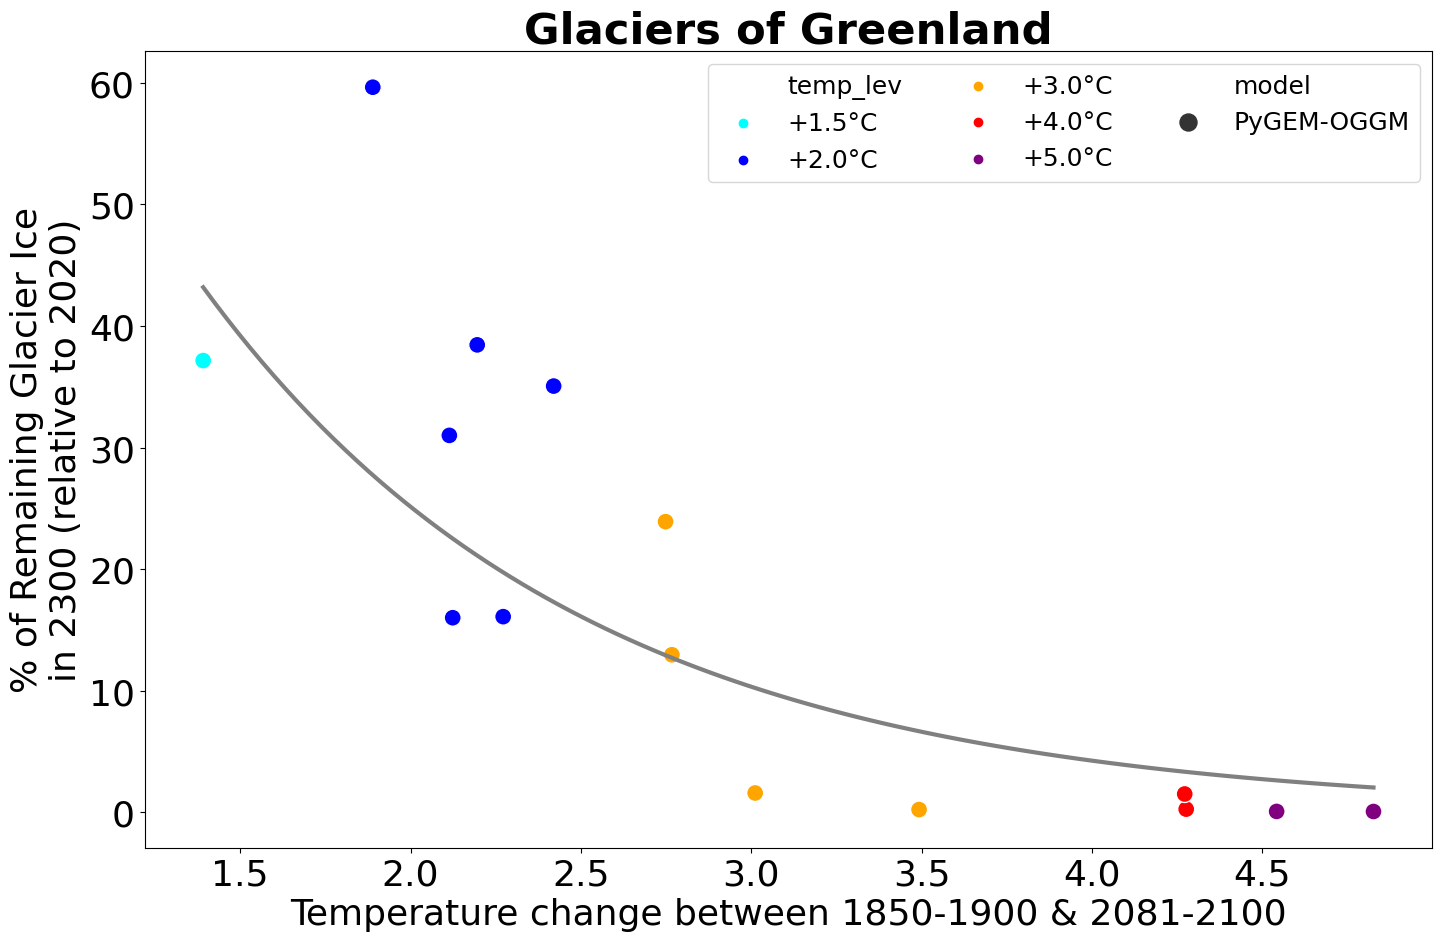

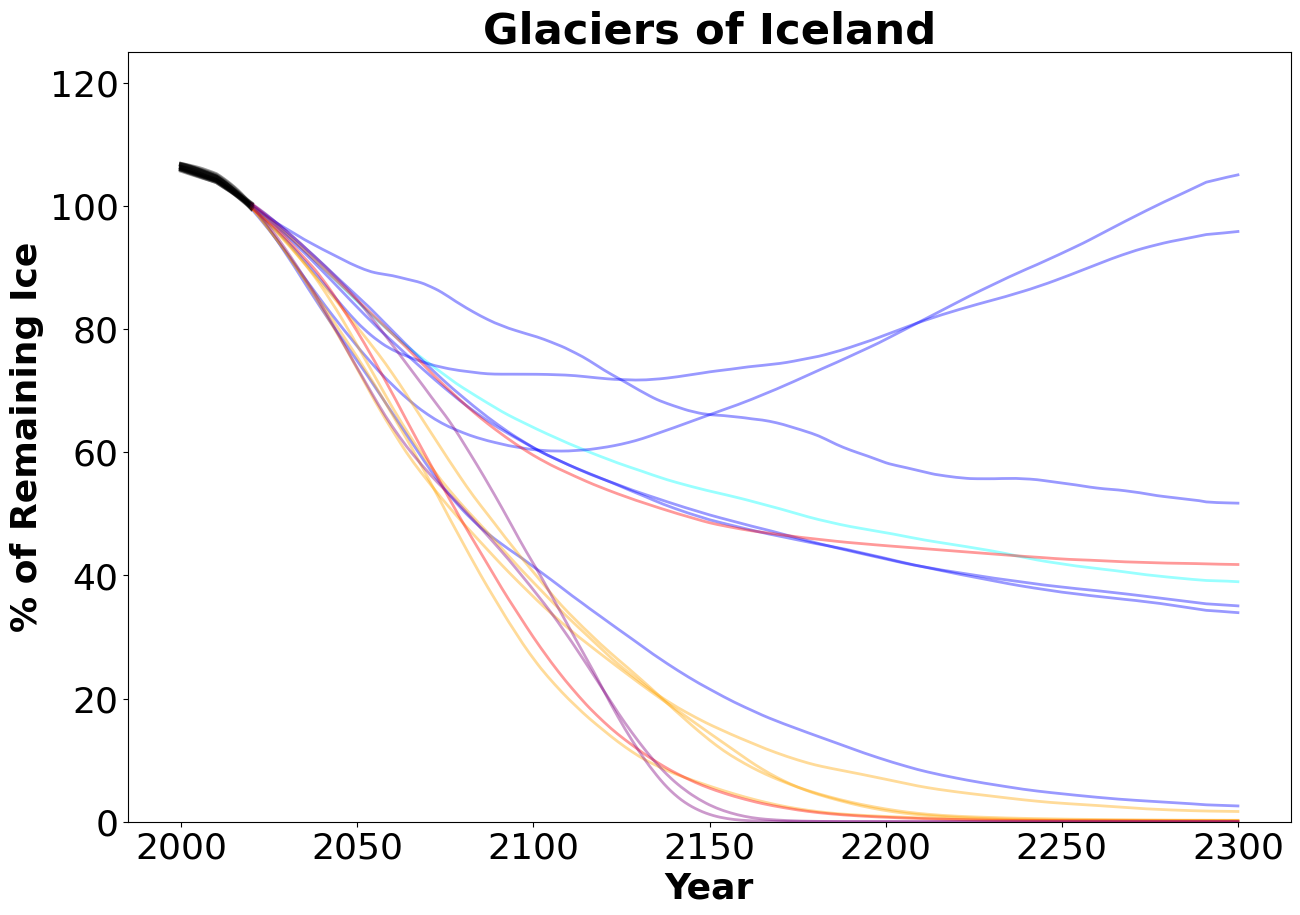

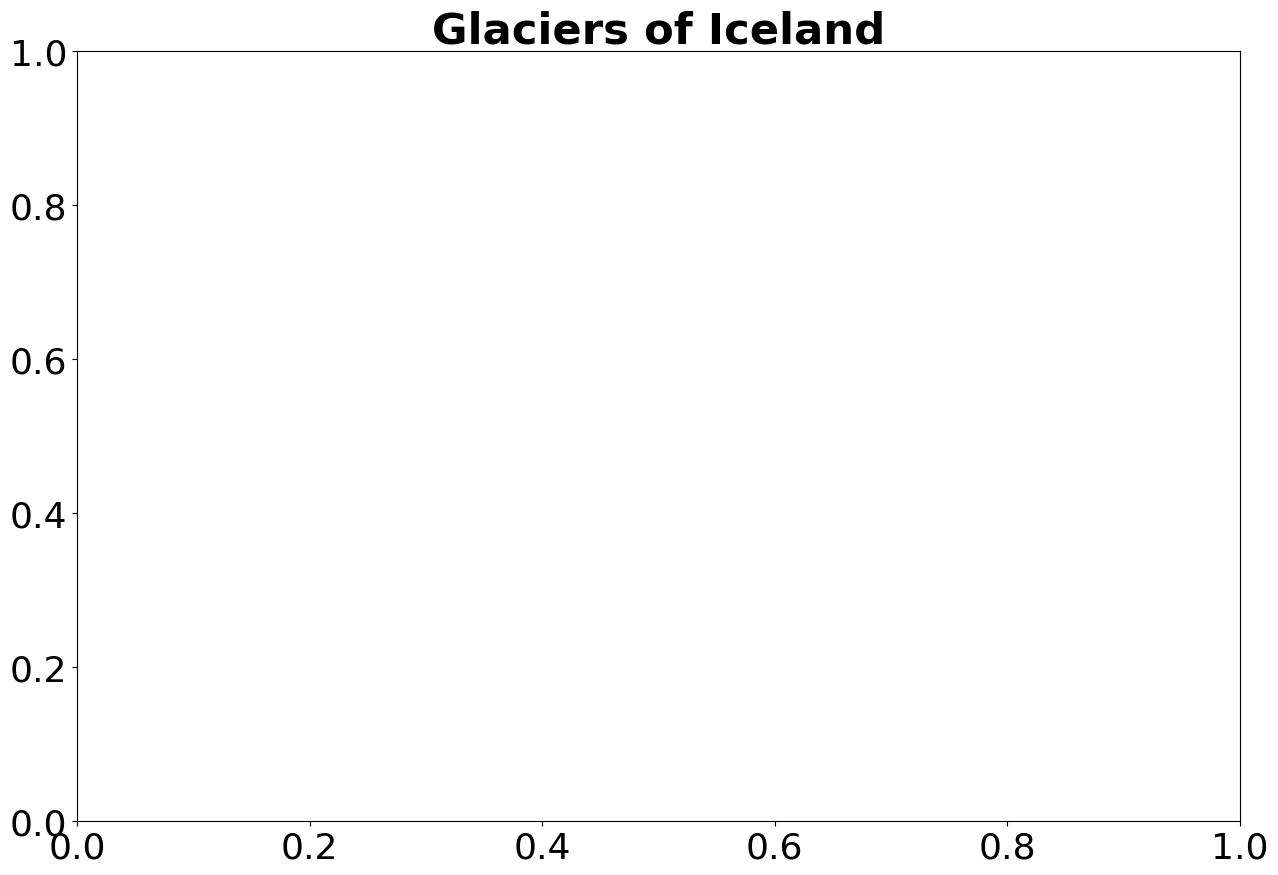

In [25]:
plt.rc('font', size=26)
for _rgi_reg in rgi_regs_global: #['11', '18', '10', '01', '06', '04', '08']:
        list_index_l = []
        err_l = []
        for m in path_d.keys():
            list_index_l.append(list(pd_cmip_temp_ch_2100.index + '_' + m))
        pd_proj_2100_2300 = pd.DataFrame(index=np.concatenate(list_index_l))
        #pd_proj_2100_2300 = pd.DataFrame(index=pd_cmip_temp_ch_2100.index)

        if _rgi_reg !='global':
            rgi_reg = f'RGI{_rgi_reg}'
        else:
            rgi_reg = _rgi_reg 
        fig, ax = plt.subplots(1,1, figsize=(15,10)) 
        fig_fit, ax_fit = plt.subplots(1,1, figsize=(15,10)) 
        #ax = axs[jj]
        #ax_fit = axs_fit[jj]
        for end_year,ls in zip(['2300'],['-']):
            for temp_lev in colors_temp.keys():
                df_rel_l = []

                for cmip,pd_cmip in zip(['CMIP5','CMIP6'],
                                        [pd_cmip5_temp_ch_2100, pd_cmip6_temp_ch_2100.loc[pd_cmip6_temp_ch_2100.ssp != 'ssp534-over']]):
                    for gcm_scenario in pd_cmip[f'global_temp_ch_level_2081-2100_preindustrial_{temp_lev}'].dropna().index:
                        for m in path_d.keys():
                            try:
                                gcm, scenario = gcm_scenario.split('_')
                                path = path_d[m]
                                gcm_scenario_m = gcm_scenario + '_' + m
                                n = len(gcm_scenario)
                                if _rgi_reg == '13-14-15':
                                    df = 0
                                    for sub_rgi_reg in ['RGI13','RGI14','RGI15']:
                                        idir = path + f'volume/{cmip}/{end_year}/{sub_rgi_reg}/'
                                        _df = pd.read_csv(idir + f'{scenario}.csv', index_col=0)
                                        _df = _df[gcm.upper()]
                                        df += _df
                                else:
                                    idir = path  + f'volume/{cmip}/{end_year}/{rgi_reg}/'
                                    df = pd.read_csv(idir + f'{scenario}.csv', index_col=0)
                                    df = df[gcm.upper()]
                                df = df.loc[2000:]
                                df_rel = 100*df/df.loc[2020]

                                df_rel_roll = df_rel.rolling(20, center=True, min_periods=1).mean().dropna()
                                alpha=0.4
                                ax.plot(df_rel_roll.loc[2020:].index, df_rel_roll.loc[2020:], lw=2, color=colors_temp[temp_lev],ls=ls, alpha = alpha) 
                                ax.plot(df_rel_roll.loc[2000:2020].index, df_rel_roll.loc[2000:2020], lw=3, color='black', ls=ls, alpha = alpha)

                                pd_proj_2100_2300.loc[gcm_scenario_m, 'global_temp_ch_2081-2100_preindustrial'] = pd_cmip.loc[gcm_scenario, 'global_temp_ch_2081-2100_preindustrial']
                                pd_proj_2100_2300.loc[gcm_scenario_m, f'rel_ice_2100_{rgi_reg}'] = df_rel.loc[2100]
            
                                pd_proj_2100_2300.loc[gcm_scenario_m, f'rel_ice_2300_{rgi_reg}'] = df_rel.loc[2300]
                                pd_proj_2100_2300.loc[gcm_scenario_m, 'model'] = m
                                pd_proj_2100_2300.loc[gcm_scenario_m, 'temp_lev'] = temp_lev
                                #if _rgi_reg == '13-14-15':
                                #    print('test')
                                #print(df_rel.min())
                                df_rel_l.append(df_rel)
                            except:
                                print(cmip, gcm_scenario)
                                pass
                if len(df_rel_l) > 0:
                    df_rel_med = pd.DataFrame(df_rel_l).T.median(axis=1)
                    if temp_lev == '+1.5°C':
                        bound = 0.25
                    else:
                        bound = 0.50
                    label = f'{temp_lev}\n'+r'$\pm$'+f'{bound}°C' #' (n={len(df_rel_l)}), in reality: {temp_lev_reality[temp_lev]}'
                    #ax.plot(df_rel_med.loc[2020:].index, df_rel_med.loc[2020:], lw=0, color=colors_temp[temp_lev],
                    #                    label = label, ls=ls)

                    #df_rel_q25 = pd.DataFrame(df_rel_l).T.quantile(0.25, axis=1)
                    #df_rel_q75 = pd.DataFrame(df_rel_l).T.quantile(0.75, axis=1)
                    #ax.fill_between(df.index, df_rel_q25, df_rel_q75, lw=0.5, alpha=0.2, 
                    #                    color=colors_temp[temp_lev],
                    #                         ls = ls)
        ax.set_ylim([0,125])
        ax.set_ylabel('% of Remaining Ice',# (relative to 2020)',
                      fontweight = 'bold')
        ax.set_xlabel('Year',  fontweight = 'bold')
        handles, labels = ax.get_legend_handles_labels()
        for h in handles:
            h.set_linewidth(3)
        ax.legend(handles, labels,
                      handlelength=1,
                      title='Temperature change between 1850-1900 & 2081-2100:', ncol=5)
        ax.legend().remove()

        ax.set_title(d_reg_num_name_icci[_rgi_reg], fontweight='bold')
        ax_fit.set_title(d_reg_num_name_icci[_rgi_reg], fontweight='bold')

        pd_proj_2100_2300 = pd_proj_2100_2300.dropna()

        for j,sim_year in enumerate([2100, 2300]):
            # Perform the curve fitting
            x = pd_proj_2100_2300['global_temp_ch_2081-2100_preindustrial']
            popt, pcov = curve_fit(exponential_decay, x,
                                   pd_proj_2100_2300[f'rel_ice_{sim_year}_{rgi_reg}'],
                                   loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
            # Generate a higher density x range for plotting the fitted curve
            x_dense = np.linspace(x.min(), x.max(), 100)
            # Extract the optimized parameters
            a_opt, b_opt = popt #c_opt
            pd_exp_decay_fits_simple.iloc[j] = (rgi_reg,sim_year, a_opt, b_opt)
            if sim_year == 2300:
                
                y_fitted_exp = exponential_decay(x_dense, a_opt, b_opt)
                
                ax_fit.plot(x_dense, y_fitted_exp, color='grey', lw=3)
                sns.scatterplot(ax=ax_fit,
                                data = pd_proj_2100_2300, #.loc[j], 
                                                x='global_temp_ch_2081-2100_preindustrial', y=f'rel_ice_{sim_year}_{rgi_reg}',
                                                style='model',
                                hue='temp_lev',hue_order=colors_temp.keys(), palette=colors_temp.values(),
                                                            color=colors_temp[temp_lev], sizes=[150], size='model')
                ax_fit.legend(fontsize=18, ncol=3)
                ax_fit.set_xlabel('Temperature change between 1850-1900 & 2081-2100')
                ax_fit.set_ylabel('% of Remaining Glacier Ice\nin 2300 (relative to 2020)')
                for j,temp_lev in enumerate(list(colors_temp.keys())[1:]):

                    
                    # for the annotation in the main plot ... 
                    fit = exponential_decay(float(temp_lev[1:4]), a_opt, b_opt)

                    if temp_lev == '+1.5°C':
                        bound = 0.25
                    else:
                        bound = 0.5
                    #if fit >1:
                    #    ax.annotate(temp_lev[1:4]+r'$\pm$'+f'{bound}°C', xy=(2300, fit), xytext=(2310, fit),
                    #                    verticalalignment="center",
                    #                    arrowprops=dict(arrowstyle= '-|>', color='black', lw=3), color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=22)
                    y_fitted = exponential_decay(np.array([float(temp_lev[1:4])-bound, float(temp_lev[1:4])+bound]), a_opt, b_opt)
                    #ax.vlines(2300-3+j*1,y_fitted[0], y_fitted[1], color=colors_temp[temp_lev], lw=15, alpha = 0.2)
                    loc_2300_stats = 2300+8*j +5
                    ax.vlines(loc_2300_stats,y_fitted[0], y_fitted[1], color=colors_temp[temp_lev], lw=15, alpha = 0.2)
                    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round', alpha = 0.8)
                    if fit >10:

                        if y_fitted[0] <120:
                            ax.annotate(temp_lev[1:]+'\n'+r'$\,\,\pm$'+f'{bound}', xy=(2300, y_fitted[0]), xytext=(loc_2300_stats-2, y_fitted[0]-0.5),
                                            verticalalignment="center",
                                            #arrowprops=dict(#arrowstyle= '-|>', 
                                            #                color='black', lw=3),
                                            color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=22)
                        else:
                            if temp_lev == '+1.5°C':
                                print(rgi_reg,y_fitted[0])
                            ax.annotate(temp_lev[1:]+'\n'+r'$\pm$'+f'{bound}', xy=(2300, 118), xytext=(loc_2300_stats+1.5, 118),
                                            verticalalignment="center",
                                            #arrowprops=dict(#arrowstyle= '-|>', 
                                            #                color='black', lw=3),
                                            color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=22)
                    else:
                        if fit > 1.5:
                            ax.annotate(temp_lev[1:], xy=(2300, y_fitted[0]), xytext=(loc_2300_stats-2, y_fitted[0]+0.5),
                                            verticalalignment="center",
                                            #arrowprops=dict(#arrowstyle= '-|>', 
                                            #                color='black', lw=3),
                                            color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=16, zorder=0, bbox=bbox)
                        else:
                            if temp_lev == '+5.0°C':
                                ax.annotate(temp_lev[1:], xy=(2300, y_fitted[0]), xytext=(loc_2300_stats-2, -2.5),
                                                verticalalignment="center",
                                                #arrowprops=dict(#arrowstyle= '-|>', 
                                                #                color='black', lw=3),
                                                color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=12, zorder=0, bbox=bbox)

                            else:
                                ax.annotate(temp_lev[1:-2], xy=(2300, y_fitted[0]), xytext=(loc_2300_stats-4, -2.5),
                                                verticalalignment="center",
                                                #arrowprops=dict(#arrowstyle= '-|>', 
                                                #                color='black', lw=3),
                                            color=colors_temp[temp_lev], alpha=1, fontweight = 'bold', fontsize=12, zorder=0, bbox=bbox)
                    ax.hlines(fit,loc_2300_stats-3, loc_2300_stats+3, lw=6, color=colors_temp[temp_lev])

                    

            elif sim_year == 2100:
                for j,temp_lev in enumerate(colors_temp.keys()):
                    if temp_lev == '+1.5°C':
                        bound = 0.25
                    else:
                        bound = 0.5
                    y_fitted = exponential_decay(np.array([float(temp_lev[1:4])-bound, float(temp_lev[1:4])+bound]), a_opt, b_opt)
                    #axs[0].vlines(2100-3+j*1,y_fitted[0], y_fitted[1], color=colors_temp[temp_lev], lw=15, alpha = 0.2)
                    #axs[0].annotate(temp_lev, xy=(2300, fit), xytext=(2310, fit),
                    #                verticalalignment="center",
                    #                arrowprops=dict(arrowstyle= '-|>', color='black', lw=3), color=colors_temp[temp_lev], alpha=1, fontweight = 'bold')
        ax.set_xlim([1997, 2349])
        ax.set_xticks([2000,2100,2200,2300])
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fig.tight_layout()
        fig_fit.tight_layout()

        #for j in np.arange(len(axs)-len_sub_p):
        #    fig.delaxes(axs[len(axs)-j-1])
        #    fig_fit.delaxes(axs_fit[len(axs_fit)-j-1])

        fig.savefig(f'only_pygem_temp_levels_{rgi_reg}.png')
        fig_fit.savefig(f'exp_fit_2300_only_pygem_temp_levels_{rgi_reg}.png')